### Load videos, loop through, save selected frames to output directory

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from tqdm import tqdm

In [2]:
%matplotlib notebook

In [3]:
def read_vid_frame(fpath, nframe=1):
    VID_PATH = fpath
    IMG_WIDTH = 480
    IMG_HEIGHT = 270
    IMG_DEPTH = 3
    IMG_AREA = IMG_WIDTH * IMG_HEIGHT
    
    vid_f = open(VID_PATH, 'rb')
    vid_f_size = IMG_WIDTH * IMG_HEIGHT * IMG_DEPTH
    
    # skip over undesired frames without processing
    for i in range(nframe):
        vid_f.read(vid_f_size)
    
    bit_str = vid_f.read(vid_f_size)
    bit_arr = np.frombuffer(bit_str, np.uint8)
    img = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH), dtype=np.uint8)
    
    for d in range(IMG_DEPTH):
        channel = np.reshape(bit_arr[d * IMG_AREA:(d+1) * IMG_AREA], 
                             (IMG_HEIGHT, IMG_WIDTH))
        img[:,:,d] = channel
    
    vid_f.close()
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    return img

In [4]:
30 * 5 * 60 

9000

In [5]:
9000/80

112.5

In [ ]:
'../data/dataset1/Videos/data_test1.rgb'

In [12]:
IMREAD_PATH = '../data/dataset{}/Videos/data_test{}.rgb'
IMWRITE_DIR = '../data/presentation_data/images'

imgs = []

for i in tqdm(range(1, 4)):
    fpath = IMREAD_PATH.format(i, i)
    print("[INFO] reading {}...".format(fpath))
    
    for f in np.arange(1, 9000, 80):
        img = read_vid_frame(fpath, f)
        imgs.append(img)
        

  0%|                                                                                  | 0/3 [00:00<?, ?it/s]

[INFO] reading ../data/dataset1/Videos/data_test1.rgb...


 33%|████████████████████████▋                                                 | 1/3 [00:22<00:45, 22.63s/it]

[INFO] reading ../data/dataset2/Videos/data_test2.rgb...


 67%|█████████████████████████████████████████████████▎                        | 2/3 [00:43<00:21, 21.81s/it]

[INFO] reading ../data/dataset3/Videos/data_test3.rgb...


100%|██████████████████████████████████████████████████████████████████████████| 3/3 [01:04<00:00, 21.58s/it]


In [17]:
45*45

2025

In [18]:
60*45

2700

In [33]:
2205 + (5 * 13)

2270

In [34]:
2205 + (5 * 15)

2280

In [39]:
# Try to find candidate NFL logos to label
IMREAD_PATH = '../data/dataset2/Videos/data_test2.rgb'
nfl_imgs = []
for f in np.arange(2270, 2280, 2):
    img = read_vid_frame(IMREAD_PATH, f)
    imgs.append(img)

<IPython.core.display.Javascript object>


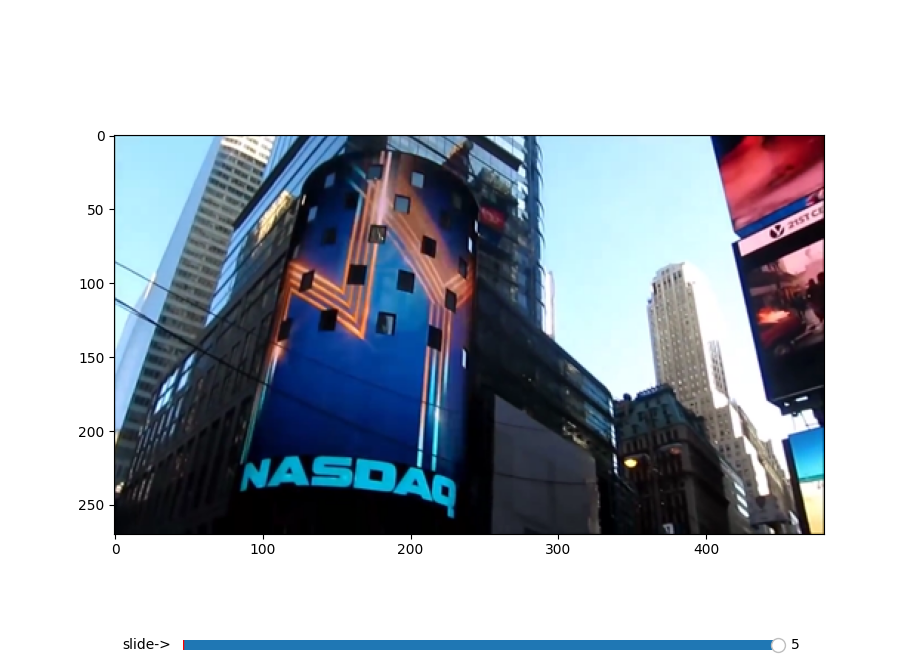

In [38]:
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(nfl_imgs[0], cv2.COLOR_BGR2RGB))

axcolor='yellow'
ax_slider = plt.axes([.2, .01, .65, .03], facecolor=axcolor)
slider = Slider(ax_slider, 'slide->', 0, len(nfl_imgs), valinit=0, valstep=1)

def update(val):
    ax.imshow(cv2.cvtColor(nfl_imgs[val], cv2.COLOR_BGR2RGB))
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

In [40]:
len(imgs)

360

<IPython.core.display.Javascript object>


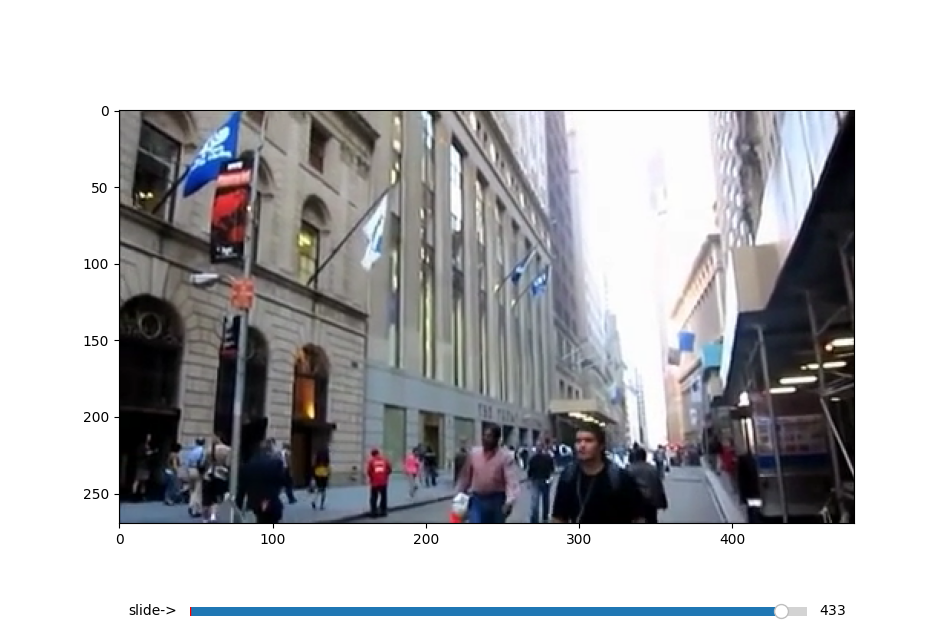

In [8]:

fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))

axcolor='yellow'
ax_slider = plt.axes([.2, .01, .65, .03], facecolor=axcolor)
slider = Slider(ax_slider, 'slide->', 0, len(imgs), valinit=0, valstep=1)

def update(val):
    ax.imshow(cv2.cvtColor(imgs[val], cv2.COLOR_BGR2RGB))
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

In [41]:
IMWRITE_DIR = '../data/presentation_data/images'
for i in range(len(imgs)):
    cv2.imwrite(os.path.sep.join([IMWRITE_DIR, "train{}.png".format(i)]), imgs[i])